**item** - product id    

**category** - product category   

**store_code** - alphanumeric code of the store    

**yearweek** - date period for the price (year-week format)    

**sell_price** - price for the product “item” for the period in “yearweek”. Prices are provided per week (average across 7 days). If not available, there were no sales for the product during that week  


In [113]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [114]:
path = "data_dsmarket\item_prices.csv"

df = pd.read_csv(path, sep=",", encoding="utf-8")

df.head(3)

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.00,12.74
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.00,12.74
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.00,10.99


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearweek,6721786.00,201382.42,145.02,201105.00,201248.00,201410.00,201515.00,201617.00
sell_price,6965706.00,5.52,4.39,0.01,2.62,4.20,7.18,134.15


In [117]:
df.describe(include='object').T

,count,unique,top,freq
item,6965706,3049,SUPERMARKET_3_587,2870
category,6965706,3,SUPERMARKET,3239821
store_code,6965706,10,BOS_2,713960


### **De que es está tabla?**  

Fila -> Precio para una semana de un producto concreto  
  
Que podemos ver aquí?  
    
- Global / Por tiendas / Comparar tiendas
- Evolución de los precios de cada producto (Si separamos por años y semanas además podemos ver por año o por semana concreta)
- Que categorías tienen más productos
- Si cruzamos con la tabla calendar podemos ver que influencia tienen en los precios eventos concretos

In [118]:
df.isna().sum()

item               0
category           0
store_code         0
yearweek      243920
sell_price         0
dtype: int64

In [119]:
df.duplicated().value_counts()

False    6753586
True      212120
Name: count, dtype: int64

In [120]:
# Coinciden las filas duplicadas con las que yearweek isna?
# Que significa esto? -> Aportan información? Creo que no
df[df.duplicated()].equals(df[df.duplicated() & df['yearweek'].isna()])

True

In [121]:
df_clean = df[df['yearweek'].notna()]

df_clean.shape

(6721786, 5)

In [122]:
df_clean.duplicated().sum()

0

In [123]:
df_clean['yearweek'].isna().sum()

0

In [124]:
infinite_mask = np.isinf(df_clean['yearweek'])

df_clean[infinite_mask].head()

,item,category,store_code,yearweek,sell_price


In [125]:
# Extraer el año y la semana
df_clean.loc[:,'yearweek'] = df_clean.loc[:,'yearweek'].astype(int).astype(str)

df_clean['year'] = df_clean.loc[:,'yearweek'].str[:4] # Año
df_clean['week'] = df_clean.loc[:,'yearweek'].str[4:6] # Semana

# Crear una nueva columna de fecha en el formato year-week
df_clean['year-week'] = df_clean.loc[:,'year'] + '-W' + df_clean.loc[:,'week']

# Convertir la nueva columna de string a un objeto datetime
df_clean.loc[:,'year-week'] = pd.to_datetime(df_clean.loc[:,'year-week'] + '-1', format='%Y-W%W-%w')

C:\Users\alexa\AppData\Local\Temp\ipykernel_13628\2267496485.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['201328' '201329' '201330' ... '201615' '201616' '201617']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_clean.loc[:,'yearweek'] = df_clean.loc[:,'yearweek'].astype(int).astype(str)
C:\Users\alexa\AppData\Local\Temp\ipykernel_13628\2267496485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean.loc[:,'yearweek'].str[:4] # Año
C:\Users\alexa\AppData\Local\Temp\ipykernel_13628\2267496485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [126]:
df_clean.head()

,item,category,store_code,yearweek,sell_price,year,week,year-week
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328,12.74,2013,28,2013-07-15 00:00:00
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329,12.74,2013,29,2013-07-22 00:00:00
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330,10.99,2013,30,2013-07-29 00:00:00
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331,10.99,2013,31,2013-08-05 00:00:00
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332,10.99,2013,32,2013-08-12 00:00:00


In [127]:
df_clean.describe(include='object')

C:\Users\alexa\AppData\Local\Temp\ipykernel_13628\2750375105.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df_clean.describe(include='object')


,item,category,store_code,yearweek,year,week,year-week
count,6721786,6721786,6721786,6721786,6721786,6721786,6721786
unique,3049,3,10,279,6,54,275
top,SUPERMARKET_3_587,SUPERMARKET,BOS_2,201608,2015,17,2015-12-28 00:00:00
freq,2790,3124861,689568,30490,1601188,145530,60948


### **Evolución Anual del Precio avg de SUPERMARKET_3_587**

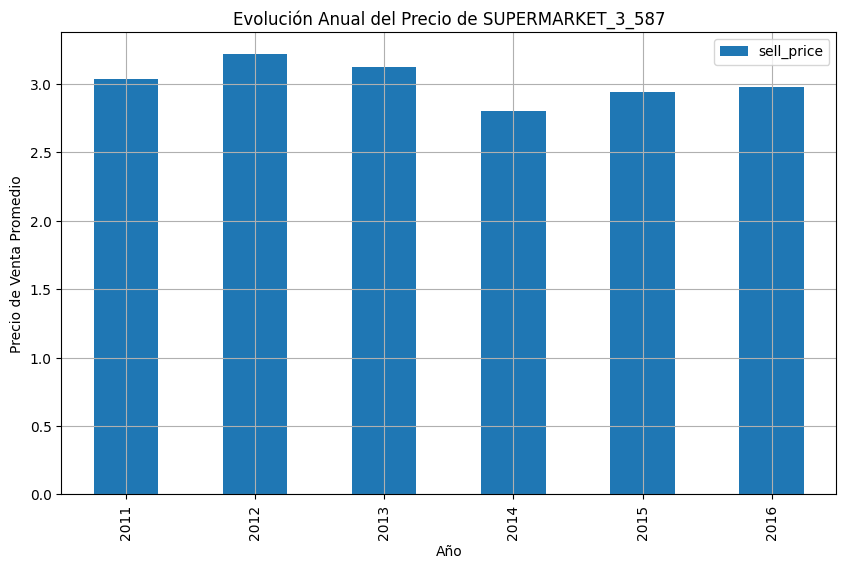

In [128]:
# Que hay que hacer para ver la evolucion del precio del
# producto SUPERMARKET_3_587 para toda la empresa a lo largo de los años?

# Filtrar el DataFrame para el producto SUPERMARKET_3_587
df_filtered = df_clean[df_clean['item'] == 'SUPERMARKET_3_587']

# Ordenar los datos por 'year-week'
df_filtered = df_filtered.sort_values(by='year-week')

# Calcular la media anual del precio de venta
annual_avg_price = df_filtered.groupby('year')['sell_price'].mean().reset_index()

# Graficar la evolución del precio anual
annual_avg_price.plot(kind='bar', x='year', y='sell_price', figsize=(10, 6), title='Evolución Anual del Precio de SUPERMARKET_3_587')
plt.xlabel('Año')
plt.ylabel('Precio de Venta Promedio')
plt.grid(True)
plt.show()

In [139]:
# Ranking productos precios más altos en el 2016

# Filtrar el DataFrame para el 2016
df_2016 = df_clean[df_clean['year'] == '2016']

# Calcular la media del precio de venta
avg_price_per_product = df_2016.groupby(['item'])['sell_price'].max().reset_index()

In [140]:
avg_price_per_product.head(10)

,item,sell_price
0,ACCESORIES_1_001,11.15
1,ACCESORIES_1_002,5.28
2,ACCESORIES_1_003,3.95
3,ACCESORIES_1_004,6.17
4,ACCESORIES_1_005,3.83
5,ACCESORIES_1_006,1.33
6,ACCESORIES_1_007,10.48
7,ACCESORIES_1_008,0.64
8,ACCESORIES_1_009,2.35
9,ACCESORIES_1_010,3.95


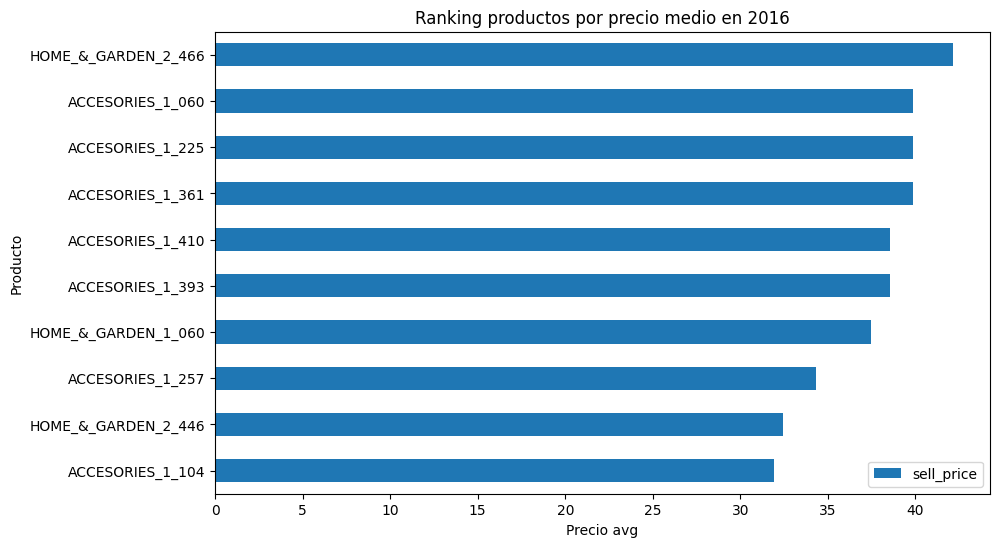

In [141]:
# Ordenar los productos por el precio promedio en orden descendente
avg_price_per_product = avg_price_per_product.sort_values(by='sell_price', ascending=False)

# Ranking productos con media de precio más alto para el 2016
avg_price_per_product.head(10).plot(kind='barh', x='item', y='sell_price', figsize=(10, 6), title='Ranking productos por precio medio en 2016')
plt.xlabel('Precio avg')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
#plt.grid(True)
plt.show()